# EfficientNet Model Building

## Fetching the Datasets

In [ ]:
# !kaggle datasets download -d paramaggarwal/fashion-product-images-small
# !unzip fashion-product-images-small.zip

## Model Building

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, Concatenate, Input
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input

2024-07-17 07:28:14.509364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 07:28:14.523654: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 07:28:14.528036: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 07:28:14.539790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-17 07:28:15.644914: W tensorflow/compiler/tf2

In [3]:
# use efficientnetb7 for feature extraction
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in model.layers:
    # layer.trainable = False

base_model.trainable = False

258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [4]:
# Define the input
inputs = Input(shape=(224, 224, 3))

# Get the output from the base model
x = base_model(inputs)

# Add Global Max Pooling
x1 = GlobalMaxPooling2D()(x)

# Add Global Average Pooling
x2 = GlobalAveragePooling2D()(x)

# Concatenate the pooled features
x = Concatenate()([x1, x2])

# Add a dense layer with 2560 features
x = Dense(2560, activation='relu')(x)
x = Dropout(0.5)(x)

# Create the model
model = Model(inputs, x)


# make a new sequential model
# model = Sequential()
# model.add(base_model)
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# # model = Sequential([base_model, GlobalMaxPooling2D(), Dense(256, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])

# # build the model
# model.build(input_shape=(None, 224, 224, 3))

# # compile the model
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

2024-07-17 07:28:41.649205: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52428800 exceeds 10% of free system memory.
2024-07-17 07:28:41.688252: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52428800 exceeds 10% of free system memory.
2024-07-17 07:28:41.696168: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 52428800 exceeds 10% of free system memory.


In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb7      │ (None, 7, 7,      │ 64,097,687 │ input_layer_1[0]… │
│ (Functional)        │ 2560)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 2560)      │          0 │ efficientnetb7[0… │
│ (GlobalMaxPooling2… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2560)      │          0 │ efficientnetb7[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 5120)      │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 2560)      │ 13,109,760 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2560)      │          0 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 77,207,447 (294.52 MB)

 Trainable params: 13,109,760 (50.01 MB)

 Non-trainable params: 64,097,687 (244.51 MB)

In [6]:
# save the model
tf.keras.models.save_model(model, 'effnetb7.keras')

### Trying out for One Image

In [34]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

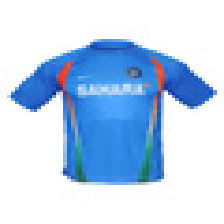

In [33]:
# load image
img_path = './data/images/1163.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img

In [35]:
# preprocess image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

In [36]:
# predict image
pred = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [37]:
pred.flatten()

array([0.9069658, 0.       , 3.4023516, ..., 0.       , 0.7055376,
       0.       ], dtype=float32)

In [38]:
norm(pred.flatten())

64.201164

In [39]:
pred.shape

(1, 2560)

### Extracting Features of All Images

In [16]:
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    res = model.predict(preprocessed_img, verbose=0).flatten()
    return res / norm(res) # L2 Normalization

In [18]:
df = pd.read_csv('preprocessed.csv')
df.head()

In [25]:
df.head()

,id,gender,masterCategory,label,subCategory,articleType,baseColour,usage,season,productDisplayName,simplifiedColor
0,1163,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Sahara Team India Fanwear Round Neck Jersey,Neutral
1,1164,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Winter,Nike Men Blue T20 Indian Cricket Jersey,Neutral
2,1165,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Mean Team India Cricket Jersey,Neutral
3,1525,Unisex,Accessories,1,Bags,Backpacks,Navy Blue,Casual,Fall,Puma Deck Navy Blue Backpack,Dark
4,1526,Unisex,Accessories,1,Bags,Backpacks,Black,Sports,Fall,Puma Big Cat Backpack Black,Dark


In [1]:
# %pip install --upgrade jupyter ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [20]:
from tqdm import tqdm

In [22]:
feature_list = []
image_paths = []

In [24]:
import os

# find all images in the folder ./data/images
image_folder = "./data/images"
image_files = os.listdir(image_folder)

In [25]:
for id in tqdm(image_files):
    # find id from i
    # id = df_mini.iloc[i]['id']
    image_path = f"./data/images/{id}"
    # print(image_path)
    features = extract_features(image_path)
    feature_list.append(features)
    image_paths.append(image_path)

100%|██████████| 44441/44441 [2:28:52<00:00,  4.98it/s]  


In [28]:
features = np.array(feature_list)
features.shape

(44441, 2560)

In [29]:
image_paths = np.array(image_paths)
image_paths.shape

(44441,)

In [30]:
import pickle

In [31]:
# export features and image paths to a binary file
with open("effnetb7_features.pkl", "wb") as f:
    pickle.dump(feature_list, f)

with open("effnetb7_images.pkl", "wb") as f:
    pickle.dump(image_paths, f)